# INVESTIGATION  OF BIAS IN MACHINE LEARNING CLASSIFICATION USING STROKE PREDICTIONS

INTRODUCTION
Artificial Intelligence as become increasingly important in our every day life and its impoortant to harness this potentials without jeopardizing our humanity. Ethical guidelines and framework are needed to be put in place.
The dataset is about stroke predictions based on certain patients attribute or personal information.
The aim is to investigate biased on protected characteristics- "Married" and the potential effect on treatment outcome.

In [1]:
!pip install imblearn


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

In [3]:
Df_stroke_predictions = pd.read_csv("Stroke Predictions.csv")
Df_stroke_predictions.head() # First 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA EXPLORATION ANALYSIS

In [4]:
Df_stroke_predictions["stroke"].replace({0: 'No', 1: 'Yes'}, inplace=True)
Df_stroke_predictions.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [5]:
Df_stroke_predictions.rename(columns={'stroke': 'stroke_status'}, inplace=True)
Df_stroke_predictions.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [6]:
Df_stroke_predictions.rename(columns={'ever_married': 'Married'}, inplace=True)
Df_stroke_predictions.head()

,id,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [7]:
Df_stroke_predictions.shape # Number of rows and columns

(5110, 12)

In [8]:
Df_stroke_predictions.describe() # statistical measures

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [9]:
# number of missing values in each column
Df_stroke_predictions.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Married                0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke_status          0
dtype: int64

In [10]:
# Replacing the null values in BMI with the mean

Df_stroke_predictions["bmi"].mean()

28.893236911794673

In [11]:
Df_stroke_predictions["bmi"].fillna("29" ,inplace =True)

In [12]:
Df_stroke_predictions.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
Married              False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke_status        False
dtype: bool

In [13]:
Df_stroke_predictions.drop(columns=["work_type", "smoking_status"] ,inplace = True)
Df_stroke_predictions.head()

,id,gender,age,hypertension,heart_disease,Married,Residence_type,avg_glucose_level,bmi,stroke_status
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,Yes
1,51676,Female,61.0,0,0,Yes,Rural,202.21,29,Yes
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,Yes
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,Yes
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,Yes


In [14]:
# There was "Other" under Gender, i decided to replace with "Female"

Df_stroke_predictions.replace({"gender":{'Other':'Female'}},inplace=True)

In [15]:
# label encoding
# One Hot Encoding, converting categorical variables into numerical values

Df_stroke_predictions.replace({"Married":{'No':0,'Yes':1}},inplace=True)
Df_stroke_predictions.replace({"gender":{'Female':0,'Male':1}},inplace=True)
Df_stroke_predictions.replace({"Residence_type":{'Rural':0,'Urban':1}},inplace=True)
Df_stroke_predictions.replace({"stroke_status":{'No':0,'Yes':1}},inplace=True)

# printing the first 5 rows of the dataframe
Df_stroke_predictions

,id,gender,age,hypertension,heart_disease,Married,Residence_type,avg_glucose_level,bmi,stroke_status
0,9046,1,67.0,0,1,1,1,228.69,36.6,1
1,51676,0,61.0,0,0,1,0,202.21,29,1
2,31112,1,80.0,0,1,1,0,105.92,32.5,1
3,60182,0,49.0,0,0,1,1,171.23,34.4,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,29,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0


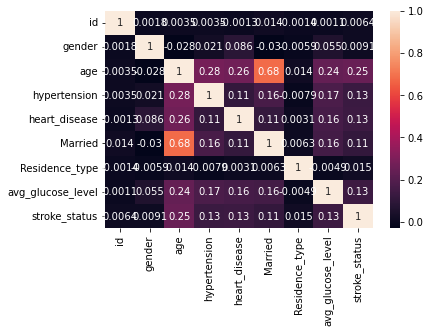

In [16]:
# Correlation Matrix

corr_matrix = Df_stroke_predictions.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# MACHINE LEARNING MODEL- SUPPORT VECTOR MACHINE

In [17]:
#splitting the data
#create the attribute and target data
X = Df_stroke_predictions.drop(columns=['id','stroke_status'],axis=1)
y = Df_stroke_predictions["stroke_status"]
X.head

<bound method NDFrame.head of       gender   age  hypertension  heart_disease  Married  Residence_type  \
0          1  67.0             0              1        1               1   
1          0  61.0             0              0        1               0   
2          1  80.0             0              1        1               0   
3          0  49.0             0              0        1               1   
4          0  79.0             1              0        1               0   
...      ...   ...           ...            ...      ...             ...   
5105       0  80.0             1              0        1               1   
5106       0  81.0             0              0        1               1   
5107       0  35.0             0              0        1               0   
5108       1  51.0             0              0        1               0   
5109       0  44.0             0              0        1               1   

      avg_glucose_level   bmi  
0                228.69  

In [18]:
y.head

<bound method NDFrame.head of 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke_status, Length: 5110, dtype: int64>

0    4861
1     249
Name: stroke_status, dtype: int64


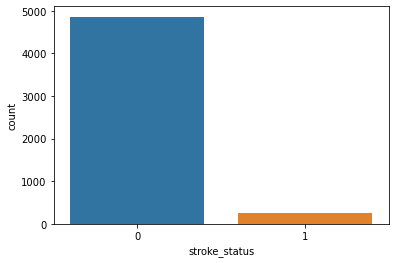

In [19]:
# Seaborn bar chart visualization showing the values of the stroke status

sns.countplot(x=Df_stroke_predictions.stroke_status,data=Df_stroke_predictions)
print(Df_stroke_predictions.stroke_status.value_counts())

In [20]:
# Data Normalization with imblearn to reduce the imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)

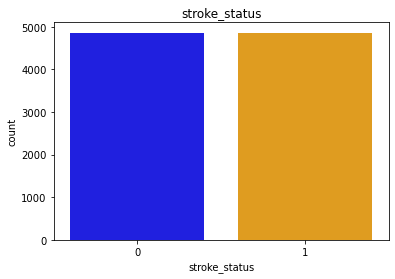

In [21]:
sns.countplot(data = Df_stroke_predictions, x = y, palette=['blue', 'orange'])
plt.title('stroke_status')
plt.show()

In [22]:
#splitting the data into training and tst data using train_test_split()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(9722, 8) (7777, 8) (1945, 8)


# EVALUATION OF SVM MODEL PERFORMANCE

In [23]:
#Create the SVM Classification mode;
#Create an SVM model with a linear kernel:
model = svm.SVC()
model.fit(X_train,y_train)



SVC()

In [24]:
#Model evaluation of training data
train_predict=model.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))
print(train_predict)

Accuracy on training data:  0.7663623505207664
Precision on training data: 0.7384898710865562
Recall on training data: 0.8248907174080741
[0 1 1 ... 0 1 1]


In [25]:
#Model evaluation of testing data
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(y_test, test_predict))


Accuracy on testing data:  0.7588688946015424
Precision on testing data: 0.738388625592417
Recall on testing data:  0.801440329218107


TN=697, FP=276, FN=193, TP=779


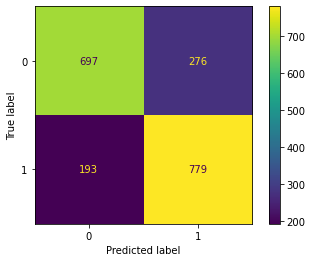

In [26]:
cm = metrics.confusion_matrix(y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
# Calculated measures

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.7588688946015424
Calculated precision =  0.738388625592417
Calculated recall =  0.801440329218107


Model evaluation on testing data and calculated measures are the same

# Group Unawareness

In [29]:
# Group unawareness, removing protected characteristics
# Married blind- I am using "Married" as protected characteristic
# Drop the Gender parameter from X_train and X_test
X_train_mb = X_train.drop(columns=['Married'])
X_test_mb = X_test.drop(columns=['Married'])

#Train a new SVM model:
model_mb = svm.SVC()
model_mb.fit(X_train_mb,y_train)

SVC()

In [30]:
#Taining Data
train_predict_mb=model_mb.predict(X_train_mb)
print("Accuracy on train data: ", metrics.accuracy_score(y_train, train_predict_mb))
print("Precision using train data:", metrics.precision_score(y_train, train_predict_mb))
print("Recall using train data:", metrics.recall_score(y_train, train_predict_mb))

Accuracy on train data:  0.7663623505207664
Precision using train data: 0.7385997236296638
Recall using train data: 0.8246335818976601


In [31]:
# Testing Data
test_predict_mb=model_mb.predict(X_test_mb)
print("Accuracy on test data: ", metrics.accuracy_score(y_test, test_predict_mb))
print("Precision using test data:", metrics.precision_score(y_test, test_predict_mb))
print("Recall on testing data: ", metrics.recall_score(y_test, test_predict_mb))

Accuracy on test data:  0.7593830334190231
Precision using test data: 0.7386363636363636
Recall on testing data:  0.8024691358024691


The result above shows no difference in the Model Evaluation of Group unawareness(Married-blind) and Married-conscious.

# SPLITTING INTO TWO GROUPS USING "MARRIED" AS PROTECTED CHARACTERISTICS

In [32]:
#Splitting the dataset into Married and Single 
#Indices for "Married" and "Single" from test data
PROTECTED  =  "Married" 
MARRIED =  1.0 #Yes 
SINGLE = 0.0 #No
married_indices = np.where(X_test[PROTECTED] == MARRIED)[0]
single_indices = np.where(X_test[PROTECTED] == SINGLE)[0]
print(married_indices, "No of Married =", married_indices.size)
print(single_indices, "No of Single =", single_indices.size)

[   0    2    3 ... 1941 1942 1944] No of Married = 1380
[   1   10   11   21   23   29   37   41   44   45   46   48   56   59
   63   71   72   73   79   80   90   93  103  105  108  112  124  126
  128  134  137  145  146  148  151  155  159  161  163  167  171  176
  177  180  185  186  196  198  199  203  206  210  211  212  214  216
  221  226  227  229  230  236  240  243  244  247  250  252  253  256
  259  277  278  283  284  286  287  288  290  297  305  309  310  311
  312  316  318  336  340  341  350  355  356  357  360  365  366  368
  370  378  382  386  394  399  401  406  409  413  414  416  417  418
  420  421  425  426  427  428  440  448  453  456  461  462  471  472
  473  488  491  492  493  498  499  501  504  508  510  517  519  520
  524  527  529  540  541  545  551  552  555  558  560  565  577  587
  588  589  599  604  606  609  613  614  623  624  626  627  628  630
  642  652  654  656  660  661  663  664  665  666  668  669  670  677
  679  680  681  685

In [33]:
#Extracting the actual outcome for the two groups
# Splitting y_test into Married list and Single list

y_test_m = [y_test.values[i] for i in married_indices]
y_test_s = [y_test.values[i] for i in single_indices]
print(y_test_m)
print(y_test_s)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 

In [34]:
# Extracting the predicted outcome for the two groups
# Splitting test_predict into Married list and Single list

test_predict_m = [test_predict[i] for i in married_indices]
test_predict_s = [test_predict[i] for i in single_indices]
print(test_predict_m)
print(test_predict_s)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 

TN_m=362, FP_m=254, FN_m=134, TP_m=630


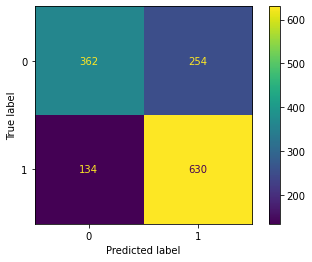

In [35]:
#Confusion Matrix for Married group

#Display of confusion metrics
cm_married = metrics.confusion_matrix(y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_married.ravel()
print("TN_m={0}, FP_m={1}, FN_m={2}, TP_m={3}".format(TN_m, FP_m, FN_m, TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_married)
disp.plot()
plt.show()

TN_s=335, FP_s=22, FN_s=59, TP_s=149


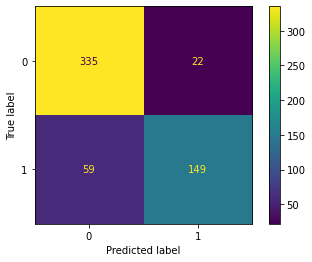

In [36]:
# Confusion Matrix for Single group
#Display of confusion matrics

#Display of confusion metrics
cm_single = metrics.confusion_matrix(y_test_s, test_predict_s)
TN_s, FP_s, FN_s, TP_s = cm_single.ravel()
print("TN_s={0}, FP_s={1}, FN_s={2}, TP_s={3}".format(TN_s, FP_s, FN_s, TP_s))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_single)
disp.plot()
plt.show()

# EQUAL ACCURACY,DEMOGRAPHIC PARITY AND EQUAL OPPORTUNITY

In [37]:
#Fairness criteria for Married group
calculated_accuracy_married = (TP_m+TN_m)/(TP_m+TN_m+FP_m+FN_m)
calculated_precision_married = (TP_m)/(TP_m+FP_m)
calculated_recall_married = (TP_m)/(TP_m+FN_m)
print("Calculated accuracy_married = ", calculated_accuracy_married)
print("Calculated precision_married = ", calculated_precision_married)
print("Calculated recall_married = ", calculated_recall_married)

Calculated accuracy_married =  0.7188405797101449
Calculated precision_married =  0.7126696832579186
Calculated recall_married =  0.824607329842932


Demographic Parity for Married group = Calculated Demographic parity_married (% positive rate) = (TP_m +FP_m) / (TP_m +FP_m + TN_m + FN_m)
= 362 + 254 / 1380 
% Positive rate for Married group = 0.4463768116


In [38]:
#Fairness criteria for Single group
calculated_accuracy_single = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
calculated_precision_single = (TP_s)/(TP_s+FP_s)
calculated_recall_single = (TP_s)/(TP_s+FN_s)
print("Calculated accuracy_single = ", calculated_accuracy_single)
print("Calculated precision_single = ", calculated_precision_single)
print("Calculated recall_single = ", calculated_recall_single)

Calculated accuracy_single =  0.856637168141593
Calculated precision_single =  0.8713450292397661
Calculated recall_single =  0.7163461538461539


demographic Parity for Single group = Calculated Demographic parity_single (% positive rate) = (TP_s +FP_s) / (TP_s +FP_s + TN_s + FN_s)
= 149+ 22 / 565
% Positive rate for Single group = 0.3026548673
